In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/My Drive/amazon_senti_data.csv",encoding = 'latin1')

In [ ]:
data.columns

Index(['text', 'sentiment'], dtype='object')

In [ ]:
#preprocessing
#taking only english comments
!pip install langdetect

In [ ]:
from langdetect import detect

In [ ]:
data["text"] = data["text"].astype(str)

In [ ]:
data["text"][:10]

0    Stuning even for the non-gamer: This sound tra...
1    The best soundtrack ever to anything.: I'm rea...
2    Amazing!: This soundtrack is my favorite music...
3    Excellent Soundtrack: I truly like this soundt...
4    Remember, Pull Your Jaw Off The Floor After He...
5    an absolute masterpiece: I am quite sure any o...
6    Buyer beware: This is a self-published book, a...
7    Glorious story: I loved Whisper of the wicked ...
8    A FIVE STAR BOOK: I just finished reading Whis...
9    Whispers of the Wicked Saints: This was a easy...
Name: text, dtype: object

In [ ]:
doc_com = list(data["text"])[:30000]

In [ ]:
len(doc_com)

30000

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
import string


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc_complete0 = []
for sentence in doc_com:
  doc = nlp(sentence)
  selected_words = " ".join(token.text for token in doc if token.tag_ in ['NN',"NNS","NNP",'NNPS'])
  doc_complete0.append(selected_words)

In [ ]:
doc_complete0[:5]

['track senery mind people vid game music game Chrono Cross games music keyboarding fresher step grate guitars orchestras anyone',
 'soundtrack anything lot reviews game soundtrack review bit opinino Yasunori Mitsuda masterpiece music timeless years beauty price tag cd money penny',
 'soundtrack music time sadness Prisoners Fate game hope Promise Girl Star inspiration teen years energy tracks Chrono Cross ~ Time Scar~ Time Dreamwatch Chronomantique Chrono Trigger soundtrack music composer work Xenogears soundtrack game price stars',
 'Soundtrack soundtrack video game music game music disk favorites Scars Time Life Death Forest Illusion Fortress Ancient Dragons Lost Fragment Drowned Valley Disk Draggons Galdorb Home Chronomantique Prisoners Fate Gale girlfriend ZelbessDisk Garden God Chronopolis Fates sea Orphange Dragon Prayer Tower Stars Dragon God Radical Dreamers Jewel soundtrack video game music Xander Cross',
 'Jaw Floor game music song story game songs doubt Chrono Cross Time Sca

In [ ]:
detect(doc_complete0[100]) == "en"

True

In [ ]:
doc_complete = []
for sent in doc_complete0:
    try:
      if detect(sent) == 'en':
        doc_complete.append(sent) 
    except:
        pass
print(doc_complete[:5])
print(len(doc_complete))

['track senery mind people vid game music game Chrono Cross games music keyboarding fresher step grate guitars orchestras anyone', 'soundtrack anything lot reviews game soundtrack review bit opinino Yasunori Mitsuda masterpiece music timeless years beauty price tag cd money penny', 'soundtrack music time sadness Prisoners Fate game hope Promise Girl Star inspiration teen years energy tracks Chrono Cross ~ Time Scar~ Time Dreamwatch Chronomantique Chrono Trigger soundtrack music composer work Xenogears soundtrack game price stars', 'Soundtrack soundtrack video game music game music disk favorites Scars Time Life Death Forest Illusion Fortress Ancient Dragons Lost Fragment Drowned Valley Disk Draggons Galdorb Home Chronomantique Prisoners Fate Gale girlfriend ZelbessDisk Garden God Chronopolis Fates sea Orphange Dragon Prayer Tower Stars Dragon God Radical Dreamers Jewel soundtrack video game music Xander Cross', 'Jaw Floor game music song story game songs doubt Chrono Cross Time Scar Ma

In [ ]:
doc_complete[:5]

['track senery mind people vid game music game Chrono Cross games music keyboarding fresher step grate guitars orchestras anyone',
 'soundtrack anything lot reviews game soundtrack review bit opinino Yasunori Mitsuda masterpiece music timeless years beauty price tag cd money penny',
 'soundtrack music time sadness Prisoners Fate game hope Promise Girl Star inspiration teen years energy tracks Chrono Cross ~ Time Scar~ Time Dreamwatch Chronomantique Chrono Trigger soundtrack music composer work Xenogears soundtrack game price stars',
 'Soundtrack soundtrack video game music game music disk favorites Scars Time Life Death Forest Illusion Fortress Ancient Dragons Lost Fragment Drowned Valley Disk Draggons Galdorb Home Chronomantique Prisoners Fate Gale girlfriend ZelbessDisk Garden God Chronopolis Fates sea Orphange Dragon Prayer Tower Stars Dragon God Radical Dreamers Jewel soundtrack video game music Xander Cross',
 'Jaw Floor game music song story game songs doubt Chrono Cross Time Sca

In [ ]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
  stop_free = " ".join([i for i in doc.lower().split() if i not in stop and i != "hotel"])
  punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
  normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
  return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 

In [ ]:
type(doc_clean)

list

In [ ]:
doc_clean[:2]

[['track',
  'senery',
  'mind',
  'people',
  'vid',
  'game',
  'music',
  'game',
  'chrono',
  'cross',
  'game',
  'music',
  'keyboarding',
  'fresher',
  'step',
  'grate',
  'guitar',
  'orchestra',
  'anyone'],
 ['soundtrack',
  'anything',
  'lot',
  'review',
  'game',
  'soundtrack',
  'review',
  'bit',
  'opinino',
  'yasunori',
  'mitsuda',
  'masterpiece',
  'music',
  'timeless',
  'year',
  'beauty',
  'price',
  'tag',
  'cd',
  'money',
  'penny']]

In [ ]:
print(*doc_clean[:5],sep ="\n")

['track', 'senery', 'mind', 'people', 'vid', 'game', 'music', 'game', 'chrono', 'cross', 'game', 'music', 'keyboarding', 'fresher', 'step', 'grate', 'guitar', 'orchestra', 'anyone']
['soundtrack', 'anything', 'lot', 'review', 'game', 'soundtrack', 'review', 'bit', 'opinino', 'yasunori', 'mitsuda', 'masterpiece', 'music', 'timeless', 'year', 'beauty', 'price', 'tag', 'cd', 'money', 'penny']
['soundtrack', 'music', 'time', 'sadness', 'prisoner', 'fate', 'game', 'hope', 'promise', 'girl', 'star', 'inspiration', 'teen', 'year', 'energy', 'track', 'chrono', 'cross', 'time', 'scar', 'time', 'dreamwatch', 'chronomantique', 'chrono', 'trigger', 'soundtrack', 'music', 'composer', 'work', 'xenogears', 'soundtrack', 'game', 'price', 'star']
['soundtrack', 'soundtrack', 'video', 'game', 'music', 'game', 'music', 'disk', 'favorite', 'scar', 'time', 'life', 'death', 'forest', 'illusion', 'fortress', 'ancient', 'dragon', 'lost', 'fragment', 'drowned', 'valley', 'disk', 'draggons', 'galdorb', 'home', 

In [ ]:
all_words = [y for x in doc_clean for y in x]
print(len(all_words))

560061


In [ ]:
#frequency calculator
dict_freq = {}
for word in all_words:
  if word in dict_freq.keys():
    dict_freq[word] += 1
  else:
    dict_freq[word] = 1

In [ ]:
dict_freq

{'track': 984,
 'senery': 2,
 'mind': 662,
 'people': 2728,
 'vid': 4,
 'game': 1581,
 'music': 2657,
 'chrono': 5,
 'cross': 71,
 'keyboarding': 1,
 'fresher': 4,
 'step': 212,
 'grate': 3,
 'guitar': 244,
 'orchestra': 32,
 'anyone': 1558,
 'soundtrack': 229,
 'anything': 1031,
 'lot': 1959,
 'review': 2105,
 'bit': 1125,
 'opinino': 1,
 'yasunori': 2,
 'mitsuda': 6,
 'masterpiece': 270,
 'timeless': 90,
 'year': 3463,
 'beauty': 182,
 'price': 1298,
 'tag': 42,
 'cd': 3875,
 'money': 2340,
 'penny': 58,
 'time': 7350,
 'sadness': 22,
 'prisoner': 30,
 'fate': 54,
 'hope': 254,
 'promise': 46,
 'girl': 750,
 'star': 2010,
 'inspiration': 64,
 'teen': 173,
 'energy': 129,
 'scar': 17,
 'dreamwatch': 1,
 'chronomantique': 2,
 'trigger': 15,
 'composer': 31,
 'work': 1772,
 'xenogears': 3,
 'video': 1162,
 'disk': 131,
 'favorite': 307,
 'life': 2436,
 'death': 352,
 'forest': 50,
 'illusion': 16,
 'fortress': 1,
 'ancient': 17,
 'dragon': 37,
 'lost': 11,
 'fragment': 12,
 'drowned': 1

In [ ]:
freq_data = pd.DataFrame({"words" : list(dict_freq.keys()),
                          "counts" : list(dict_freq.values())})

In [ ]:
freq_data.sort_values(by = "counts",inplace= True, ascending= False,ignore_index= True)

In [ ]:
freq_data.head(15)

,words,counts
0,book,20625
1,movie,10084
2,time,7350
3,story,4800
4,cd,3875
5,one,3634
6,film,3557
7,year,3463
8,song,3382
9,album,3269


In [ ]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [ ]:
dictionary

In [ ]:
doc_term_matrix[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

In [ ]:
results = ldamodel.print_topics(num_topics=5, num_words=10)

In [ ]:
print(*results,sep = "\n")

(0, '0.111*"room" + 0.034*"bed" + 0.019*"bathroom" + 0.018*"pool" + 0.014*"floor" + 0.014*"night" + 0.013*"shower" + 0.012*"breakfast" + 0.010*"door" + 0.009*"towel"')
(1, '0.019*"dog" + 0.017*"time" + 0.014*"staff" + 0.013*"parking" + 0.013*"stay" + 0.012*"location" + 0.010*"neighborhood" + 0.009*"metro" + 0.009*"monaco" + 0.009*"lot"')
(2, '0.019*"de" + 0.017*"la" + 0.013*"le" + 0.011*"un" + 0.010*"et" + 0.009*"da" + 0.008*"e" + 0.008*"est" + 0.006*"trs" + 0.006*"pa"')
(3, '0.037*"location" + 0.030*"restaurant" + 0.030*"staff" + 0.022*"room" + 0.022*"place" + 0.019*"town" + 0.016*"street" + 0.016*"breakfast" + 0.015*"parking" + 0.015*"area"')
(4, '0.066*"room" + 0.046*"staff" + 0.032*"breakfast" + 0.024*"night" + 0.021*"stay" + 0.019*"service" + 0.018*"desk" + 0.016*"time" + 0.016*"day" + 0.013*"place"')


- As we can see it is not at all a good model

# Lets try clustering approach

In [ ]:
import gensim
tokenized_sents = data["text"].apply(lambda x: x.split()) # tokenizing
model_w2v = gensim.models.Word2Vec(
            tokenized_sents,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

In [ ]:
model_w2v.train(tokenized_sents, total_examples= len(tokenized_sents), epochs=20)

(71771165, 96089640)

In [ ]:
model_w2v.wv["king"]

array([ 0.09276841, -0.18821466, -0.12107853,  0.3491867 ,  0.4475555 ,
       -0.4243699 , -0.38508508, -0.21707599,  0.33396268, -0.7364127 ,
       -0.01630478,  0.52315396, -0.15832089,  0.22639549,  0.09386869,
       -0.35483664,  0.88883734,  0.41660744, -0.5532295 ,  0.12208392,
        0.232582  , -0.3683448 , -0.20196405,  0.67905474, -0.4653389 ,
        0.36154   ,  0.09360485, -0.01388098, -0.41252363, -0.20324369,
       -0.52511007,  0.3807996 ,  0.27634645, -0.08534093, -0.39266348,
        0.13456857, -0.4652502 , -0.6305023 , -0.18273284,  0.09510469,
       -0.35733306, -0.20192295,  0.06844459, -0.12109973,  0.15175086,
        0.0749175 ,  0.37009156, -0.5980667 , -0.13656616,  0.22759166,
        0.0834001 ,  0.2710336 , -0.4017032 ,  0.2127976 , -0.1811644 ,
        0.40575507,  0.6471957 ,  0.05225357, -0.04531626,  0.05617144,
       -0.1632227 , -0.2501947 , -0.10144155,  0.35817602, -0.73034614,
        0.37267366, -0.03477462, -0.42419454, -0.3204681 , -0.03

In [ ]:
model_w2v.wv.most_similar("service") 

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('customer', 0.8236969113349915),
 ('service,', 0.6174720525741577),
 ('Customer', 0.6013633608818054),
 ('service.', 0.5877460241317749),
 ('unreturned,', 0.5812762379646301),
 ('department,', 0.56834876537323),
 ('service!!!', 0.5516288876533508),
 ('DeLonghi', 0.5510367751121521),
 ('DeeVeeDees', 0.545364499092102),
 ('RMA', 0.5443617701530457)]

In [ ]:
top_1000_words = freq_data.iloc[:5000,:]
len(top_1000_words)

5000

In [ ]:
top_1000_words.head()

,words,counts
0,book,20625
1,movie,10084
2,time,7350
3,story,4800
4,cd,3875


In [ ]:
import numpy as np
wordvec_arrays = np.zeros((len(top_1000_words), 200)) 
wordvec_arrays.shape

(5000, 200)

In [ ]:
for i in range(len(top_1000_words)):
  try:
    wordvec_arrays[i,:] = model_w2v[top_1000_words.words[i]].reshape((1, 200))
  except:
     wordvec_arrays[i,:] = np.zeros((1, 200)) .reshape((1, 200))

  wordvec_df = pd.DataFrame(wordvec_arrays) 

wordvec_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0.148191,-0.107102,0.013634,0.100492,0.155857,0.000316,0.067000,0.442531,-0.127611,-0.359092,0.453153,-0.136633,0.118523,0.034184,0.191607,-0.514162,-0.132389,-0.249263,-0.312846,0.047840,-0.321367,-0.076807,-0.274012,-0.061261,-0.072409,0.171357,0.204451,0.165607,-0.026389,-0.008948,-0.131114,0.076471,0.028914,0.121061,0.001348,0.335797,0.070032,-0.192550,-0.332973,0.351117,...,0.388932,-0.168485,-0.004268,-0.012660,-0.172010,0.134553,0.080707,0.044453,-0.306089,-0.137061,0.046843,-0.328848,0.003381,0.144741,-0.032472,-0.245934,0.051985,0.022332,0.181495,-0.216759,-0.197195,-0.156564,0.034258,0.178386,-0.062803,-0.281043,-0.135741,-0.497151,-0.088516,0.054209,0.150685,-0.400494,0.107150,0.443616,0.132572,0.370025,0.021805,-0.265843,0.361245,-0.021812
1,0.081201,-0.115719,0.161352,0.565111,0.390465,-0.023322,0.306651,0.169325,0.384612,-0.526594,-0.041201,0.161913,-0.115895,-0.134312,0.528633,-0.210568,-0.244186,0.226441,-0.327836,0.060593,-0.317398,-0.229096,-0.229483,0.089318,-0.366898,0.420617,0.346966,0.413947,0.078586,-0.474681,0.160498,0.295476,0.221085,0.012870,-0.009168,-0.067251,0.148006,-0.168362,0.080686,0.224155,...,0.112524,-0.092366,0.086645,0.224049,0.070788,0.029909,-0.128792,0.328136,-0.228064,-0.101058,-0.116497,-0.066644,0.021158,0.066242,0.454837,-0.156283,0.048864,0.198228,0.132862,0.001217,-0.169031,0.120173,0.153306,0.404974,0.262162,0.119129,0.014269,-0.065269,-0.199050,0.070605,-0.008057,-0.062973,-0.069977,0.217604,0.152290,0.027064,-0.310365,-0.456290,0.448838,0.026482
2,0.370791,-0.273067,0.238959,0.174110,-0.115733,0.144648,-0.007338,0.120002,0.195573,-0.189133,0.341852,-0.103739,-0.196357,0.040304,-0.034582,-0.000799,0.168817,0.453871,0.081408,0.348736,0.175110,0.199206,-0.035565,0.324802,-0.467981,0.040482,0.120221,-0.048395,-0.015371,-0.448208,0.152569,0.145809,0.142582,0.032096,0.061586,-0.023076,-0.616483,-0.072392,-0.057642,0.417420,...,0.341243,-0.677256,0.081699,0.268046,-0.273065,-0.011812,-0.191319,0.031821,-0.043856,-0.111805,0.064160,-0.617394,-0.039320,-0.097739,0.273153,-0.060483,0.474120,-0.128125,-0.067713,-0.724447,0.146870,0.239801,0.038259,0.516455,-0.000839,-0.127000,0.405443,-0.061591,-0.037195,0.314634,0.567447,-0.139371,-0.078860,-0.069783,0.029277,-0.134342,-0.120016,0.339187,0.082663,-0.019762
3,-0.057185,-0.377672,-0.019924,0.239006,0.507050,-0.287964,0.084727,-0.000161,-0.060028,-0.153777,0.223999,0.478354,-0.019082,-0.007951,0.293757,-0.292060,-0.020045,-0.043781,-0.976526,-0.081257,0.238880,-0.581388,-0.178126,0.101675,-0.339667,0.506702,-0.082808,0.181512,0.003419,0.107751,-0.021166,0.578599,0.447649,0.278196,-0.325932,0.239426,-0.194389,-0.093561,-0.029024,0.200891,...,0.420022,-0.130109,0.083149,-0.097745,-0.078376,0.169364,-0.074003,-0.161909,-0.485903,0.219006,0.031577,-0.088933,0.021559,0.278127,0.400355,0.340015,-0.124058,0.274761,0.143213,0.226003,-0.133446,-0.160867,0.085032,0.152418,0.043778,0.281033,-0.161714,-0.074483,0.035859,0.205031,0.436852,-0.131054,-0.051345,0.480604,0.263148,0.148792,-0.074208,0.072367,0.022141,-0.209383
4,0.423484,-0.046954,-0.461334,-0.083205,0.201269,-0.369531,0.053179,0.224091,0.277959,-0.325849,0.266329,0.354226,-0.148947,0.021900,0.473608,0.082254,-0.534209,-0.214039,0.034110,0.178566,-0.001790,-0.288302,0.043625,-0.139819,-0.369506,0.008965,0.150013,0.013363,0.188133,-0.362982,-0.381427,-0.294562,0.112385,-0.103908,-0.065429,-0.188141,0.318131,0.136223,-0.234853,0.766396,...,0.518604,-0.208979,-0.071018,0.574787,-0.355853,0.088823,-0.008024,0.119651,-0.117072,-0.400724,-0.005077,-0.613250,0.153882,0.037637,0.106701,-0.471858,0.424844,-0.162491,0.544205,0.064379,-0.230286,0.195481,0.429661,0.192543,0.210366,0.409177,-0.365520,-0.058794,-0.013429,0.062266,-0.

In [ ]:
from sklearn.cluster import DBSCAN 

In [ ]:
# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.0375, min_samples = 5).fit(wordvec_df) 
labels = db_default.labels_ 

In [ ]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [ ]:
#kmeans clustering
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(wordvec_df)

In [ ]:
kmeans.labels_

array([0, 3, 3, ..., 1, 3, 4], dtype=int32)

In [ ]:
#clusters
def find_cluster_words(list_words,cluster_no):
  cluster_list_words = []
  for i in range(len(list(kmeans.labels_))):
    if kmeans.labels_[i] == int(cluster_no):
      cluster_list_words.append(list_words[i])
  return cluster_list_words

In [ ]:
cluster_0 = find_cluster_words(top_1000_words.words,0)
cluster_1 = find_cluster_words(top_1000_words.words,1)
cluster_2 = find_cluster_words(top_1000_words.words,2)
cluster_3 = find_cluster_words(top_1000_words.words,3)
cluster_4 = find_cluster_words(top_1000_words.words,4)

In [ ]:
print(cluster_0[:12])
print(cluster_1[:12])
print(cluster_2[:12])
print(cluster_3[:12])
print(cluster_4[:12])

['book', 'story', 'character', 'life', 'author', 'novel', 'plot', 'world', 'child', 'man', 'woman', 'reader']
['diaper', 'month', 'baby', 'piece', 'son', 'size', 'case', 'daughter', 'pampers', 'side', 'toy', 'hand']
['orwell', 'keanu', 'weisz', 'joyce', 'kerry', 'ii', 'brokaw', 'wwii', 'boleyn', 'amazoncom', 'mar', 'golding']
['movie', 'time', 'cd', 'one', 'film', 'year', 'song', 'album', 'way', 'thing', 'people', 'music']
['product', 'dvd', 'money', 'review', 'quality', 'work', 'version', 'problem', 'page', 'amazon', 'price', 'video']


In [ ]:
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

In [ ]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(wordvec_df) 
    kmeanModel.fit(wordvec_df)     
      
    distortions.append(sum(np.min(cdist(wordvec_df, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / len(wordvec_df))
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(wordvec_df, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / len(wordvec_df) 
    mapping2[k] = kmeanModel.inertia_ 

In [ ]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 3.7109500587746655
2 : 3.653774989980402
3 : 3.446678413871707
4 : 3.421032254451932
5 : 3.420204981578726
6 : 3.3929280058865507
7 : 3.4028790887088913
8 : 3.3908907842019107
9 : 3.3807802523069195


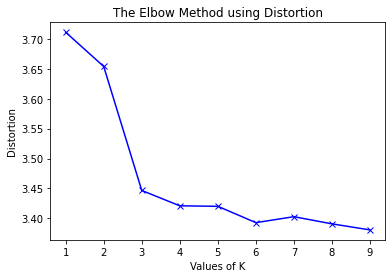

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [ ]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 75036.37322196868
2 : 73069.53130338193
3 : 71189.12114798298
4 : 70215.11733585603
5 : 70180.52477967516
6 : 69066.74004586022
7 : 69502.48663432943
8 : 69012.83820846862
9 : 68605.19351581011


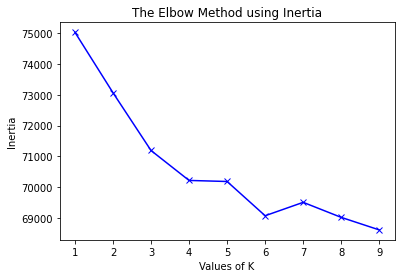

In [ ]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [ ]:
import pickle
pickle.dump(kmeans, open("hotel_aspect.pkl", "wb"))

In [ ]:
kmeans = pickle.load(open("hotel_aspect.pkl", "rb"))

In [ ]:
kmeans.labels_

array([4, 2, 1, 3, 0, 3, 3, 2, 4, 2, 4, 3, 1, 2, 4, 0, 2, 4, 1, 4, 3, 3,
       0, 1, 3, 0, 2, 4, 2, 3, 0, 4, 4, 1, 3, 3, 2, 3, 2, 3, 4, 0, 1, 1,
       4, 4, 0, 3, 2, 3, 4, 4, 4, 0, 2, 3, 3, 4, 3, 0, 4, 3, 4, 2, 3, 1,
       2, 2, 0, 4, 0, 3, 3, 3, 0, 3, 3, 2, 2, 4, 0, 2, 3, 3, 0, 2, 2, 3,
       2, 3, 4, 1, 4, 0, 2, 4, 0, 3, 0, 0, 2, 2, 2, 3, 4, 1, 3, 3, 1, 1,
       4, 3, 3, 2, 2, 2, 3, 4, 3, 3, 4, 3, 2, 3, 2, 4, 0, 1, 2, 0, 0, 4,
       0, 0, 4, 3, 0, 4, 3, 4, 3, 2, 2, 2, 2, 1, 4, 2, 2, 2, 2, 4, 2, 2,
       2, 4, 0, 2, 2, 4, 2, 1, 0, 0, 3, 3, 1, 4, 4, 0, 0, 0, 2, 2, 3, 3,
       4, 2, 4, 0, 0, 2, 3, 3, 3, 3, 2, 3, 0, 3, 2, 2, 3, 2, 2, 3, 1, 2,
       2, 4, 2, 4, 3, 2, 2, 2, 2, 0, 2, 1, 0, 3, 0, 2, 2, 4, 0, 0, 0, 3,
       4, 4, 0, 4, 4, 2, 3, 1, 3, 0, 4, 1, 4, 1, 4, 3, 3, 4, 2, 2, 4, 3,
       1, 2, 4, 2, 3, 0, 4, 2, 3, 2, 1, 0, 2, 3, 1, 4, 4, 3, 3, 1, 2, 2,
       2, 2, 0, 4, 2, 2, 3, 2, 0, 3, 4, 3, 2, 2, 0, 0, 3, 3, 3, 2, 2, 3,
       4, 0, 3, 4, 4, 1, 4, 0, 3, 0, 2, 2, 2, 2, 4,

In [ ]:
with open("room_infra_2000.txt", "w") as f:
    for s in cluster_1:
        f.write(str(s) +" ")

In [ ]:
with open("food_2000.txt", "w") as f:
    for s in cluster_3:
        f.write(str(s) +" ")

In [ ]:
with open("service_2000.txt", "w") as f:
    for s in cluster_4:
        f.write(str(s) +" ")

In [ ]:
with open("location_2000.txt", "w") as f:
    for s in cluster_0:
        f.write(str(s) +" ")

In [ ]:
with open("amenities.txt", "w") as f:
    for s in cluster_4:
        f.write(str(s) +" ")

#### LDA2VEC

In [ ]:
!pip install LDA2Vec

  Created wheel for LDA2Vec: filename=lda2vec-0.16.10-cp36-none-any.whl size=14430 sha256=b5bcbc87e7145015e7f7e87cc7bff717322d50888e4b4307121bc5d0084a5522
  Stored in directory: /root/.cache/pip/wheels/73/46/3c/d6d69eaa65fa03389b2d5b2e96bad4d8d09c670bdbab289e61
Successfully built LDA2Vec


#### Research Paper Experiment

In [ ]:
#list of aspects
battery = ["battery","charge","back up","dead","drainage","power"]
display = ["glass","body","display","screen","fingerprint","watch","touchscreen","sensor","resolution"]
camera = ["camera","clarity","picture","click","selfi","pixel"]
value_for_money = ["price","budget","value","money","range","worth"]
performance = ["performance","heating","lag","RAM","processing","processor","features","operating"]

In [ ]:
import pandas as pd
data = pd.read_csv("phone_user_review_file_2.csv",encoding = "latin1")

In [ ]:
data.extract = data.extract.astype("str")

In [ ]:
data.extract[:10]

0    The telephone headset is of poor quality , not...
1    This is my first smartphone so I have nothing ...
2    Great phone. Battery life not great but seems ...
3        Best 90 quid I've ever spent on a smart phone
4    I m happy with this phone.it s very good.thx team
5    Exelent phone. Evriting perfect. Service is am...
6    Great mobile, but contains malware, in the for...
7    maneggevole, pratico, veloce, ottime foto........
8    Prodotto ECCELLENTE!!! Praticamente perfetto, ...
9    Cercavo un telefono che avesse una fotocamera ...
Name: extract, dtype: object

In [ ]:
data.shape

(114925, 11)

In [ ]:
!pip install langdetect
from langdetect import detect

     |████████████████████████████████| 983kB 9.2MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=01ebe0a46aea3fadf4845af2b10c6a72974e28b73332e68aa272d9784c6bba74
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
all_sents = []
for review in list(data.extract)[:10000]:
  doc = nlp(review)
  for sent in doc.sents:
    all_sents.append(sent.text)

In [ ]:
all_sents = []
for review in list(data.extract)[:10000]:
  for sent in review.split("."):
    all_sents.append(sent)

In [ ]:
doc_complete = []
for sent in all_sents:
    try:
      if detect(sent) == 'en':
        doc_complete.append(sent) 
    except:
        pass
print(doc_complete[:5])
print("this doc has {} english sentences.".format(len(doc_complete)))

['The telephone headset is of poor quality , not understood that dijen you when you call that sounds very bad, not recomiento this article', ' I wanted to return it but it is very difficult and expensive it back from Venezuela , since the dollars in my country are scarce and would consist more than the', "This is my first smartphone so I have nothing to compare it to, but I'm very satisfied and it seems to have the specifications and capabilities of a much more expensive phone and does everything well", 'Great phone', ' Battery life not great but seems to be getting bit better with every charge']
this doc has 6376 english sentences.


In [ ]:
def aspect_sent_check(sentence, words):
    res = [any([k in s.lower().split() for k in words]) for s in sentence]
    print(res)
    return [sentence[i] for i in range(0, len(res)) if res[i]]

In [ ]:
def aspect_sent_check_details(sentence_list, words):
    for sent in sentence_list:
      if any([k in sent.lower().split() for k in words]):


    return [sentence[i] for i in range(0, len(res)) if res[i]]

In [ ]:
battery_aspect_sents = aspect_sent_check(doc_complete,battery)
battery_aspect_sents[:25]

[False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, Fa

[' Battery life not great but seems to be getting bit better with every charge',
 ' A few months down the line it became a big issue with a massive battery drain',
 ' I like the clock face on the front, Good battery life lasts day to 1',
 " I had to return it because I couldn't get it to charge so I couldn't turn it on",
 'we give the presetn today to our daughter and It came with a battery that is not working and can not be charged',
 ' Just got it like 3 days ago and within a day I decided to get rid of Color Os because the battery drainage was clearly evident',
 'Looks and feels good,excellent battery life, no update available on colours os, and not very user friendly',
 ' The battery is still as long lasting as it was when I got it, which is a rarity these day',
 "Love this mobile phone, I won't go on about it too much, just to say that its performance is excellent, good battery life, and there are plenty of settings to make your battery last longer",
 ' Battery lasts 2 days',
 'ha

In [ ]:
display_aspect_sents = aspect_sent_check(doc_complete,display)
display_aspect_sents[:25]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, Fal

[' HD screen for really sharp pictures if you are streaming movies',
 ' Excellent that it even comes with a screen saver',
 'Really, great screen',
 ' Display hat etwas schÃ¤chen',
 'Screen is very sharp and gives excellent colors and viewing angles, Features and smart details in the software, Camera is great with high quality images and many options like a 50Megapixel mode, RAW, Animated GIF, Slow shutter mode, Superb HDR-mode',
 ' The body tolerable slim, with a thickness of about 9',
 ' In a perfect world the only thing I would want better in this phone is the screen on time(battery), it is good but you always want more juice, right? Pre ordered my Find 7 in June, the white version',
 ' Great build quality and fantastic screen',
 ' The phone box was in an anonymous looking brown box which itself contained a very sleek black box not dissimilar to a fancy watch box',
 'Clear, crisp big screen',
 'Am using this phone from past 2 weeks, 2K display best in business its beats LG G3, Snapd

In [ ]:
camera_aspect_sents = aspect_sent_check(doc_complete,camera)
camera_aspect_sents[:25]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

['very good phone looks great with the cover with clock window ,fantastic camera',
 'Screen is very sharp and gives excellent colors and viewing angles, Features and smart details in the software, Camera is great with high quality images and many options like a 50Megapixel mode, RAW, Animated GIF, Slow shutter mode, Superb HDR-mode',
 " Camera is amazing, graphics are good and I have dropped it out of second storey windows and it just won't quit",
 'I was very apprehensive in moving away from the Nexus range of phones as i have been native Android for many years, however the want for a good portable camera as lead me to the OPPO Find 7 phone',
 ' Brilliant camera too!',
 ' Fast performance, loud speakers, good camera',
 "Was worried when ordered this but so shocked as how good it is wipes the floor with my HTC One m9 so many features other phones don't have a great music player with superb sound great camera and I'm now using this as my main phone and putting my galaxy note 4 to one si

In [ ]:
value_for_money_aspect_sents = aspect_sent_check(doc_complete,value_for_money)
value_for_money_aspect_sents[:25]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa

['Totally brilliant phone for the money',
 "This is my wife's phone and she said she would recommend this phone to anyone who is looking for a phone that doesn't can't afford the price of a more expensive one",
 'Fantastic phone! Very good value for that price',
 'This is an excellent phone for the money and came in lovely packaging',
 " Now its sorted it does all I want well so if you don't want to spend a lot of money this is for you",
 'It deserves all the money',
 'I bought one for my nephew, the phone looks really stylish and a quad core for this price is very very cheap already, my nephew never gets and slow responds and freeze on the phone now!',
 'This has to be the best budget phone ever',
 ' So its only worth three stars max',
 'I was very apprehensive in moving away from the Nexus range of phones as i have been native Android for many years, however the want for a good portable camera as lead me to the OPPO Find 7 phone',
 ' Cannot fault for the price Only downside with my u

In [ ]:
sentence = "it's an awesome phone From mi, camera clicks awesome extrrem level and battery backup nice 👌👌👌👌👌 if any one thinking to buy this phone, performance is good,it one of the best camera phone in such a price range... thanks flipcart 🤝🤝🤝🤝".split(".")

In [ ]:
res = [any([k in s.lower().split() for k in camera]) for s in sentence]
res

[True, False, False, False]

In [ ]:
[sentence[i] for i in range(0, len(res)) if res[i]]

["it's an awesome phone From mi, camera clicks awesome extrrem level and battery backup nice 👌👌👌👌👌 if any one thinking to buy this phone, performance is good,it one of the best camera phone in such a price range"]

In [ ]:
aspect_sent_check(sentence,camera)

[True, False, False, False]


["it's an awesome phone From mi, camera clicks awesome extrrem level and battery backup nice 👌👌👌👌👌 if any one thinking to buy this phone, performance is good,it one of the best camera phone in such a price range"]

In [ ]:
sent_list = []
for sent in sentence:
    if any([k in sent.lower().split() for k in camera]):
      sent_req = 

sent_list

["it's an awesome phone From mi, camera clicks awesome extrrem level and battery backup nice 👌👌👌👌👌 if any one thinking to buy this phone, performance is good,it one of the best camera phone in such a price range"]